In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from numpy import inf
import seaborn as sns
import math
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from matplotlib.pyplot import figure

In [ ]:
# First cleaning the data
# Normalising with respect to each ones wild type

data = pd.read_excel('GSE85914_combined.xlsx', sheet_name = 'COMBINED', index_col = 2)
# print(data)


for i in range(3):
    data.iloc[:,4+i]=data.iloc[:,4+i]/data.iloc[:,3]  # dapF
    
for i in range(4):
    data.iloc[:,8+i]=data.iloc[:,8+i]/data.iloc[:,7]  #dgK
    
for i in range(4):
     data.iloc[:,13+i]=data.iloc[:,13+i]/data.iloc[:,12]   #entC
        
for i in range(3):
     data.iloc[:,18+i]=data.iloc[:,18+i]/data.iloc[:,17]  #ppk
        
for i in range(3):
     data.iloc[:,22+i]=data.iloc[:,22+i]/data.iloc[:,21]  #zwf

data=data.drop(columns=['Strand','Name','Product','Expression WT 2','Expression WT','Expression WT 3','Expression WT 4','Expression WT 5'])


# data.values[data.values == inf] = 0
# np.nan_to_num(data.values,nan=0.0)
# data=data.fillna(0)

data_replacedNA= data.replace(np.nan, 0)
data2_replacedNA= data_replacedNA.replace(inf,1)
dmax_replacedNA=data2_replacedNA.values.max()
data_replacedNA=data_replacedNA.replace(inf,dmax_replacedNA)


data_removedNA=data.dropna()
data2= data_removedNA.replace(inf,1)
dmax=data2.values.max()
data_removedNA=data_removedNA.replace(inf,dmax)


#data_log.to_excel('BENG 212 PROJECT_with inf and NaN replaced_numbers_log_.xlsx')


# data
# data.to_excel('BENG 212 PROJECT_with highest_only_numbers_log.xlsx')
        

  



In [ ]:
# Now for visualizatin of data
# heirarchial clustering 

data_numpy_log=np.log2(data_replacedNA.values)
data_log=pd.DataFrame(data_numpy_log,index=data.index,columns=data.columns)
data_log= data_log.replace(-inf,0)
# data_log.to_excel('BENG 212 PROJECT_with highest_only_numbers_log.xlsx')
        

sns.set(color_codes=True)

g = sns.clustermap(data_log)

data_numpy_log_rem=np.log2(data_removedNA.values)
data_log_rem=pd.DataFrame(data_numpy_log_rem,columns=data.columns)
data_log_rem= data_log_rem.replace(-inf,0)
data_log_rem.to_excel('BENG 212 PROJECT_with inf and NaN removed_numbers_log_.xlsx')
        

sns.set(color_codes=True)

g = sns.clustermap(data_log_rem)








In [5]:
data_log_rem.values.max()


9.869208250550827

We observe from the heirarchial clustering of the full dataset that most of the suppressor strains that rescue the knockouts of specific strains cluster among themselves.This heirarchial clustering is based on the log fold change of the suppresor/parent strain with respect to the wildtype. This is expected since rescuing can be understood as restoring the negative effects produced by a knockouts like for say upregulating the function of a molecule that has similar metabolism effects as the knocked out gene or another that controls the toxicity by downregulating another toxic that interacts with the previous to lower the effect overall. This rule is not true in some cases where the second mutation doesn't play a role related to the first mutation's negative effects, but increases the growth rate(in this particular experiment) by lets say better adapting to the M9 minimal media. This can be seen for example in the entC suppressor strain 3-1 which is quite far off from EntC sup 2-1, parent and the entC-suppressor 1-1 which are clustered together themselves. For analysing which genes are upregulated or downregulated, we can observe the heatmap(although a better approach would be to narrow down to some genes), which indicates a high fold expression in genes clustered at the top. Narrowing down to some genes may also result in better visualization. Note the bottom clustering is done by removing the genes containing zero expression of the wild type strain because then comparison would be very difficult with the other strains, like the fold change measurement would be difficult. The top clustering is done by replacing NaN with zeroes and infinities with one.

In [65]:
data = pd.read_excel('BENG 212 PROJECT_with highest_only_numbers_log.xlsx', sheet_name = 'Sheet1', index_col = 0)



In [56]:
gene_info = pd.read_excel('GSE85914_combined.xlsx', sheet_name = 'COMBINED', sep=r'\s*,\s*', encoding="utf-8-sig", index_col = 2)
gene_info.head()

,Strand,Name,Product,Expression WT,Expression dapF_parent,Expression dapF_sup_1-1,Expression dapF_sup_3-1,Expression WT 2,Expression dgk_parent,Expression dgk_sup_1-1,...,Expression entC_sup_2-1,Expression entC_sup_3-1,Expression WT 4,Expression ppk,Expression ppk_sup_1-1,Expression ppk_sup_1-2,Expression WT 5,Expression zwf_parent,Expression zwf_sup_1-1,Expression zwf_sup_1-2
Synonym,,,,,,,,,,,,,,,,,,,,,
b0001,+,thrL,thr operon leader peptide,261,428,534,373,261,215,166,...,260,220,319,293,240,277,261,202,274,310
b0002,+,thrA,Bifunctional aspartokinase/homoserine dehydrog...,1314,1757,1168,1385,1314,833,528,...,1173,1014,655,725,630,903,1314,1386,1228,907
b0003,+,thrB,homoserine kinase,809,865,404,729,809,752,373,...,911,289,414,518,438,593,809,918,683,591
b0004,+,thrC,L-threonine synthase,356,399,178,345,356,355,180,...,386,232,208,256,213,303,356,399,298,259
b0005,+,yaaX,DUF2502 family putative periplasmic protein,14,13,13,11,14,17,28,...,29,14,20,18,24,23,14,14,26,28


In [57]:
[m, n] = data.shape # m = #genes, n = #samples

# normalize the data
dataframe = pd.DataFrame(data, 
                         columns = data.columns, index = data.index)

# compute the covariance matrix


# pandas covariance
Cx = dataframe.T.cov()*((n-1)/n) 

# display the 10x10 section
Cx.iloc[:10, :10] #iloc uses numbers instead of indices (which would be loc)



Synonym,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010
Synonym,,,,,,,,,,
b0001,0.287429,0.241013,0.094191,0.101176,0.052032,0.001296,-0.036410,-0.031139,0.062445,0.184751
b0002,0.241013,0.720486,0.606304,0.573355,0.229176,-0.012331,0.136099,0.015777,0.095240,0.275664
b0003,0.094191,0.606304,0.696815,0.604191,0.288928,0.054284,0.135031,0.038377,0.057512,0.118348
b0004,0.101176,0.573355,0.604191,0.557827,0.278563,-0.007257,0.126812,0.041289,0.030395,0.112185
b0005,0.052032,0.229176,0.288928,0.278563,0.674108,-0.089380,0.104780,0.013830,0.001318,0.056927
b0006,0.001296,-0.012331,0.054284,-0.007257,-0.089380,0.160801,-0.015672,-0.021635,0.020725,0.006388
b0007,-0.036410,0.136099,0.135031,0.126812,0.104780,-0.015672,0.129069,0.019394,0.016745,0.044495
b0008,-0.031139,0.015777,0.038377,0.041289,0.013830,-0.021635,0.019394,0.064741,-0.045243,-0.066444
b0009,0.062445,0.095240,0.057512,0.030395,0.001318,0.020725,0.016745,-0.045243,0.195735,0.215384


In [58]:
# remove the diagonal with subtraction
Cx_offdiag = np.subtract(Cx, np.multiply(Cx, np.identity(m)))

# obtain the top 5 gene pairs
# stack creates a series with the pairs as multi-indexers
# sort puts the highest values first if ascending = False
# [:10] takes the first ten elements, which will contain repeated pairs
# [::2] takes every second element, which eliminates the repeat pairs
top_5_cx = Cx_offdiag.stack().sort_values(ascending = False)[:10][::2]

top_5_cx

Synonym  Synonym
b3709    b0278      24.266061
b0716    b3079      23.958715
b0532    b2956      23.647608
b1476    b0996      23.592003
b2956    b1546      23.370952
dtype: float64

In [59]:
# look up these gene pairs
# create a dataframe to house this info
top_5_info = pd.DataFrame(columns = ['gene1', 'name1', 'product1', 'gene2', 'name2', 'product2',])

# iterate through the pairs. "enumerate" returns a number for easier indexing, too.
for num, gene_pair in enumerate(top_5_cx.index):
    # get information on each gene
    gene_info1 = gene_info.loc[gene_pair[0], ['Name', 'Product']]
    gene_info2 = gene_info.loc[gene_pair[1], ['Name', 'Product']]
    
    # store it in the dataframe we created using a list
    top_5_info.loc[num] =[gene_pair[0]] + gene_info1.tolist() + [gene_pair[1]] + gene_info2.tolist()
    
top_5_info

,gene1,name1,product1,gene2,name2,product2
0,b3709,tnaB,tryptophan transporter of low affinity,b0278,yagL,CP4-6 prophage; DNA-binding protein
1,b0716,ybgO,putative fimbrial protein,b3079,ygjJ,putative periplasmic protein
2,b0532,sfmD,putative outer membrane export usher protein,b2956,yggM,DUF1202 family putative secreted protein
3,b1476,fdnI,"formate dehydrogenase-N, cytochrome B556 (gamm...",b0996,torC,"trimethylamine N-oxide (TMAO) reductase I, cyt..."
4,b2956,yggM,DUF1202 family putative secreted protein,b1546,tfaQ,Qin prophage; putative tail fiber assembly pro...


Covarying genes are supposed to perform similar functions and/or be from the same operon.

0: yagL is a DNA-binding protein that exists in the cytosol while tnaB resides in the inner membrane. As of now yagL is uncharacterized in EcoCyc and Uniprot. Perhaps the tryptophan transporter is somehow integral yagL or vice versa. 

1: YbgO is a hypothetical protein (according to EcoCyc) but that sequence similarities suggest that it might be an outer membrane porin which could perhaps facilitate the transport of YgjJ from periplasm to outside of the cells (??). Apparently it has been found recently that Ybjo is an inner membrane protein. Perhaps both of these proteins act along the same pathway and are activated and deactivated by the same substrate(s). 

2:Perhaps sfmD is the outer membrane export usher protein which facilitates the secretion of the DUF 1202 family protein, yggM. 

3:TorC is a part of the anaerobic respiratory chain of trimethylamine-N-oxide reductase TorA. Formate dehydrogenase (FdnI) allows E.coli to use formate as major electron donor during anaerobic respiration, when nitrate is used as electron acceptor. I wonder what these two genes have in common.

4: So YggM still has an unknown function and hasn't been characterized while TfaR is part of the tail fiber assembly. I also don't see how these two are related at a cursory glance.

In [61]:
data = pd.read_excel('BENG 212 PROJECT_with highest_only_numbers_log_1.xlsx',sheet_name= 'Genes_Samples', index_col = 0)
metadata=pd.read_excel('BENG 212 PROJECT_with highest_only_numbers_log_1.xlsx', sheet_name='metadata', index_col = 0)
#separate sheet created by grouping data from first excel sheet. 

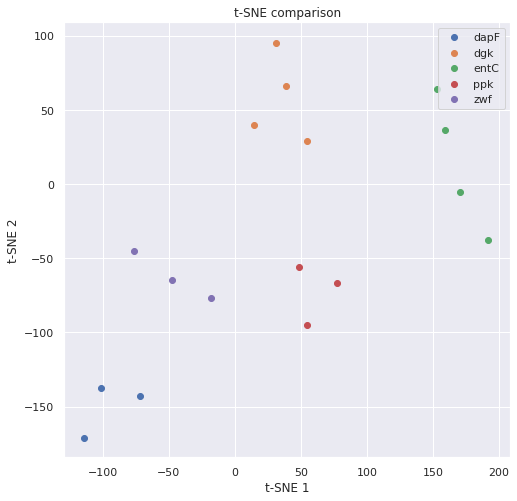

In [64]:
# Creating tsne plot using transposed data
data_tsne = TSNE(n_components=2, perplexity=5).fit_transform(data.T)

#necessary to convert to dataframe for plotting
df_data_tsne=pd.DataFrame(data_tsne, index=data.columns, columns=('1','2'))

#plotting the figure 
figure, ax = plt.subplots(figsize=(8,8))

#emptu list for appending the grouped datas
legend =[]

#loop using groups from metadata and positions from df_tsne_data in a single scatter plot. 
for name, group in metadata.groupby('Parent'):
    #1,2 are strings since they are manually put as index in the dataframe.
    ax.scatter(df_data_tsne.loc[group.index,'1'], df_data_tsne.loc[group.index,'2'])
    legend.append(name)
            
plt.legend(legend,loc='best')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("t-SNE comparison")
plt.show()

Unlike PCA, axes in the low dimensional space in t-SNE don't have a particular meaning. t-SNE doesn't construct explicit mappings relating the high dimensional and low dimensional spaces. Rather, the relevant information is in the relative distances between low dimensional points. t-SNE captures structure in the sense that neighboring points in the input space will tend to be neighbors in the low dimensional space. So from this t-SNE plot, we can interpret that points clustering together have similar gene expression. Color coding according to parent gene mutations correlates with t-SNE's cluster groups. However, the relative distance between the clusters doesn't mean anything as they would mean in PCA. 

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:2313: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


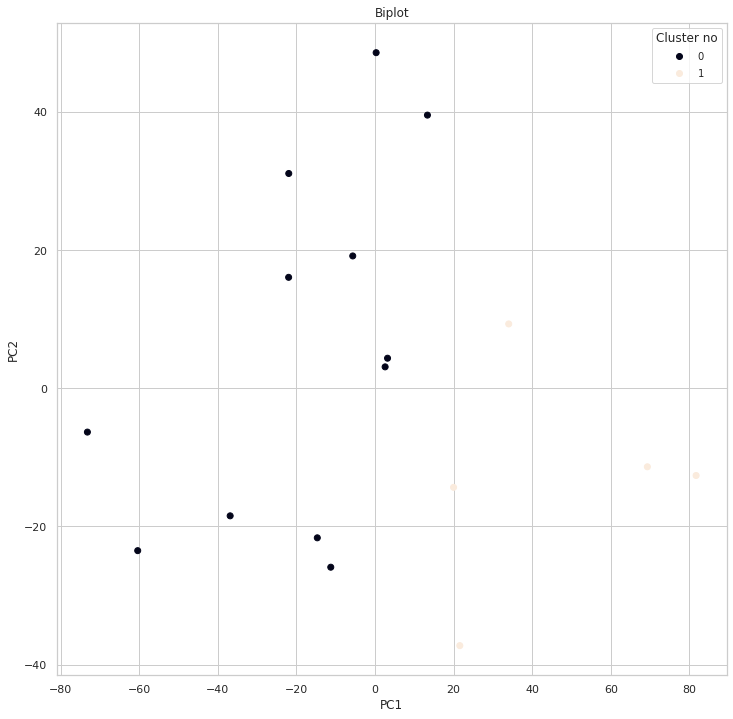

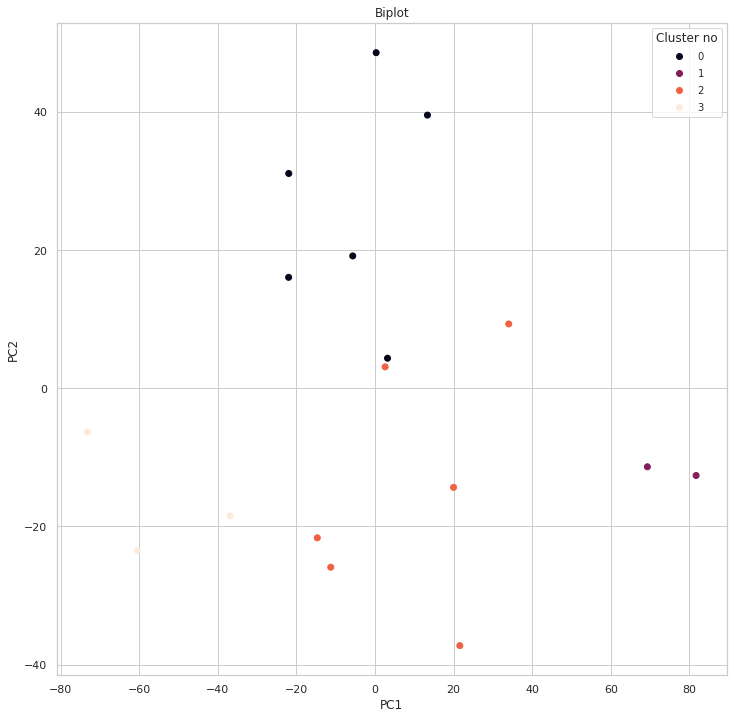

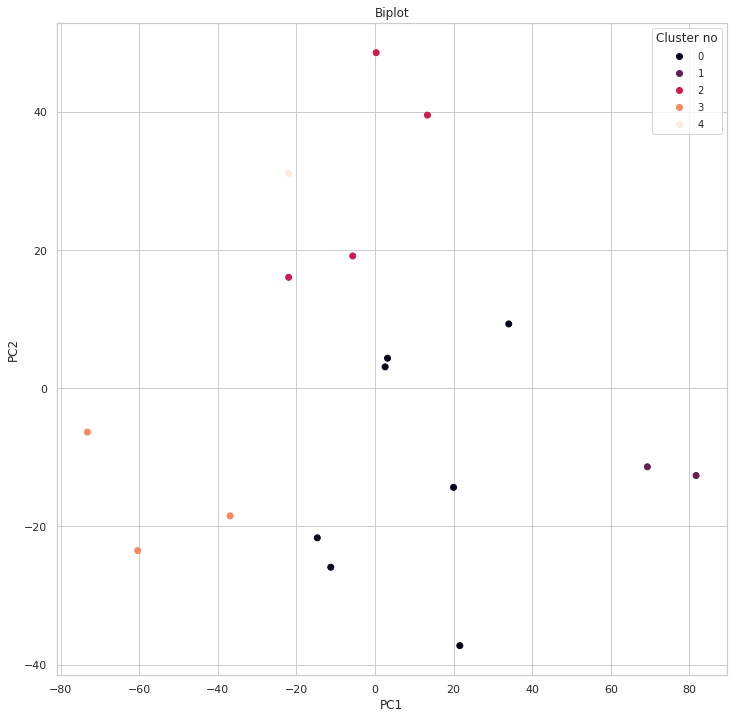

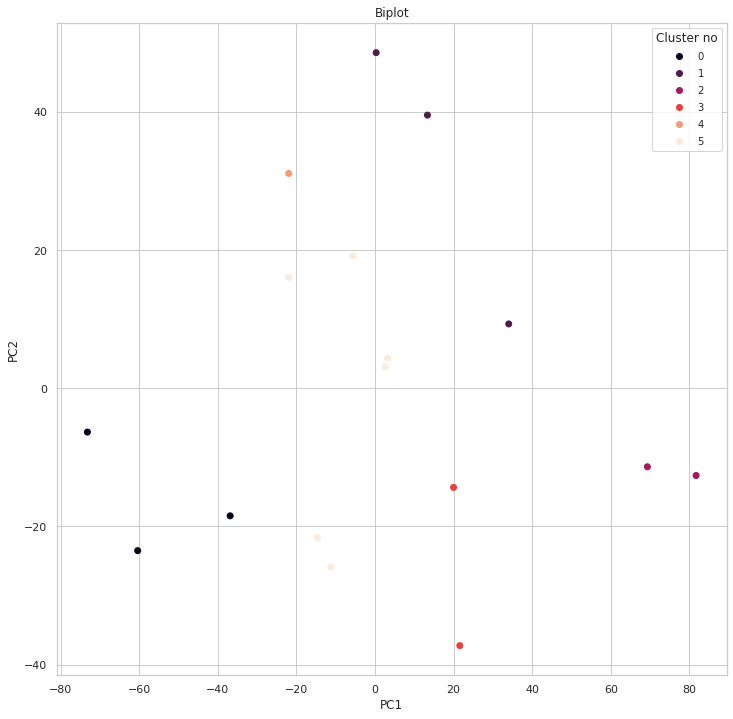

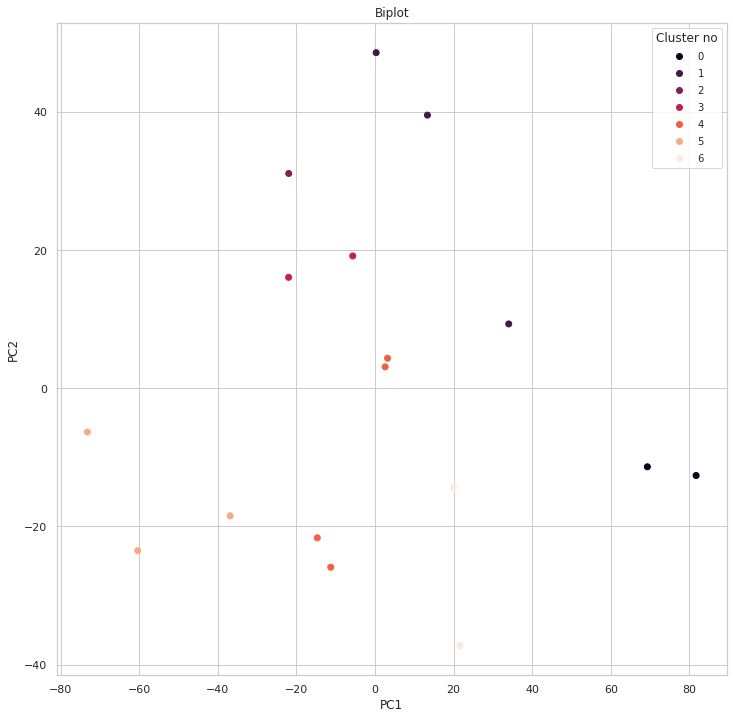

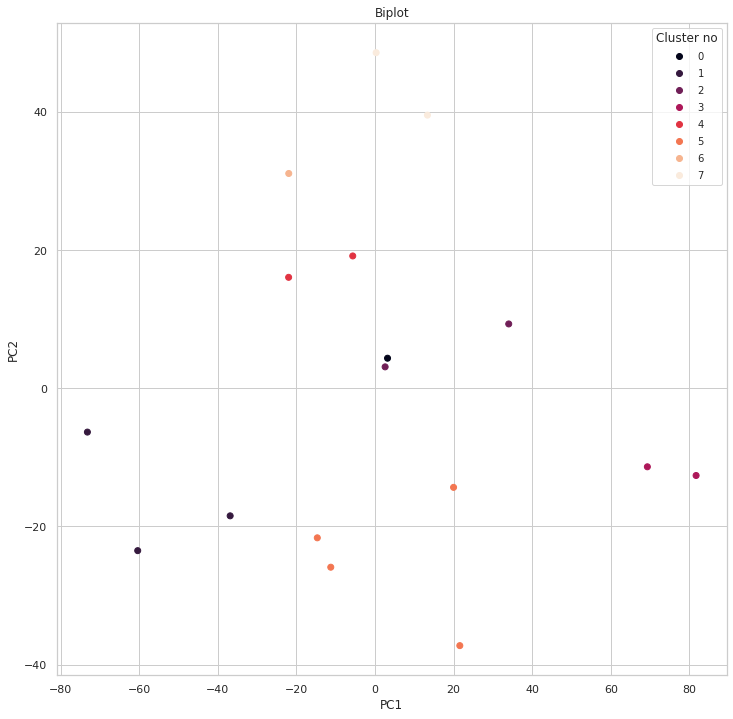

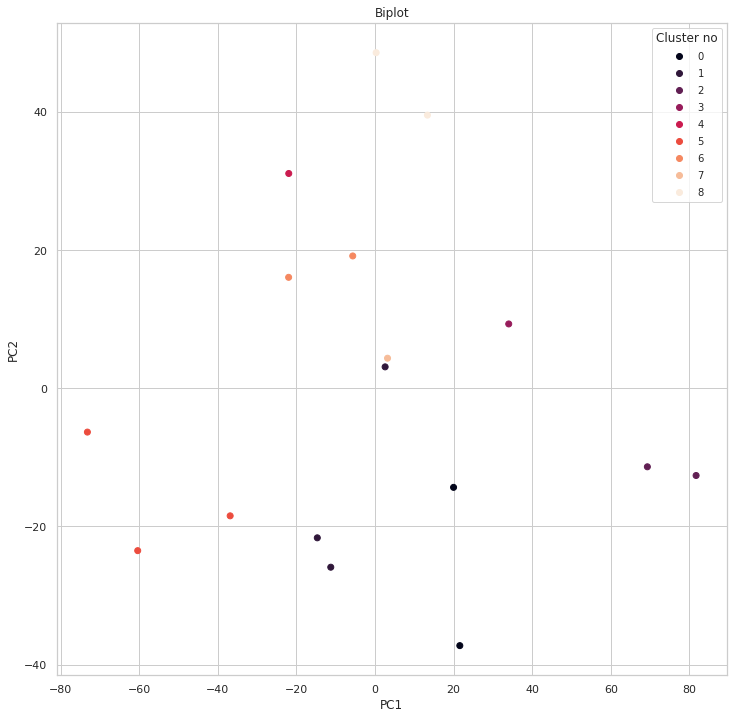

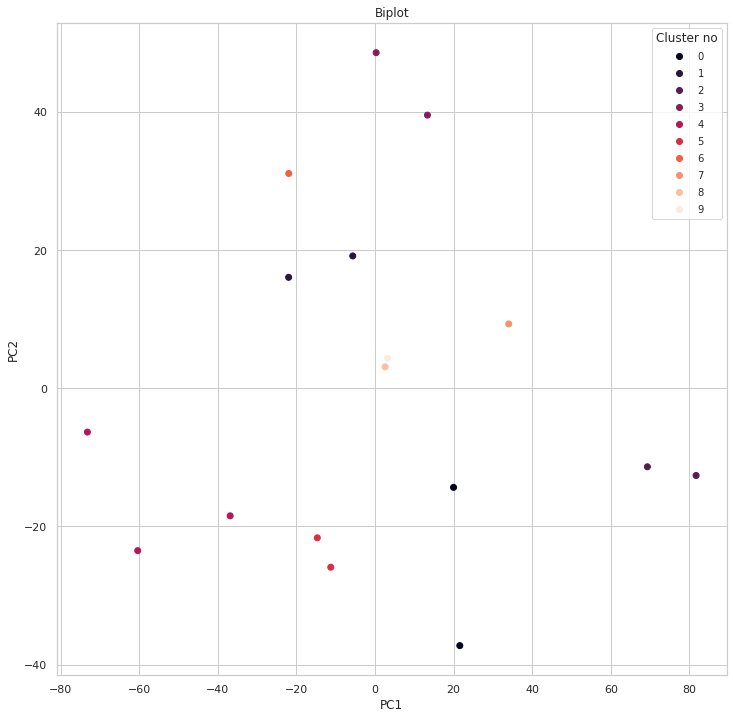

In [45]:
from sklearn.cluster import KMeans
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set(style="whitegrid")

data_norm = pd.DataFrame(stats.zscore(data_log_rem, axis = 1), columns = data.columns)
data_norm= data_norm.replace(-inf,0)
data_norm= data_norm.replace(inf,1)
data_norm= data_norm.replace(np.nan, 0)
X=data_norm.T.values



range_no_clusters=[2,4,5,6,7,8,9,10]
for no_clusters in range_no_clusters:

    kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(X)
    #     print(kmeans.labels_)
    #clust_center=kmeans.cluster_centers_
    #print(clust_center)
    pca=PCA()
    prin_comp=pca.fit_transform(X)
    X_pc1=prin_comp[:,0]
    Y_pc2=prin_comp[:,1]
    Colour_clusters=kmeans.labels_


    fig,ax = plt.subplots(figsize=(12,12))
    plt.title("Biplot")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    scatter = ax.scatter(X_pc1, Y_pc2, c=Colour_clusters)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster no",prop={'size': 10})


    plt.show()

SC for number of clusters=  2 is  0.14860141078353079


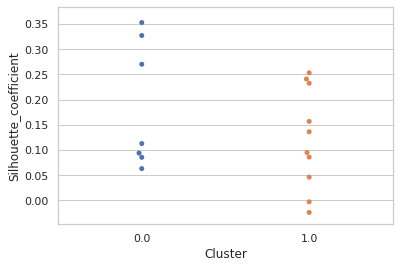

SC for number of clusters=  4 is  0.20135952309871818


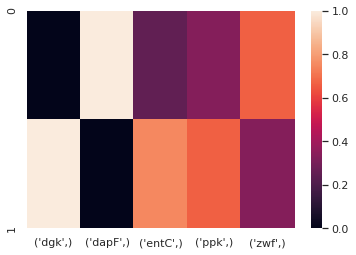

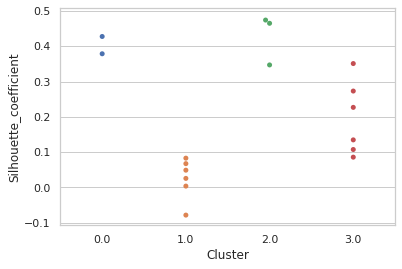

SC for number of clusters=  5 is  0.2076210421279462


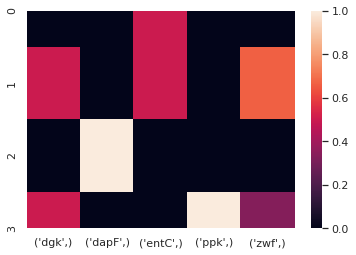

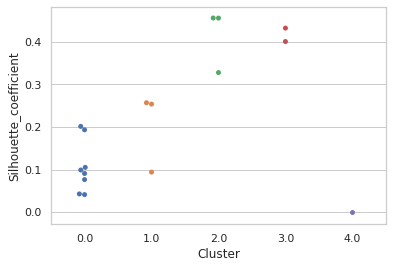

SC for number of clusters=  6 is  0.18487808927121466


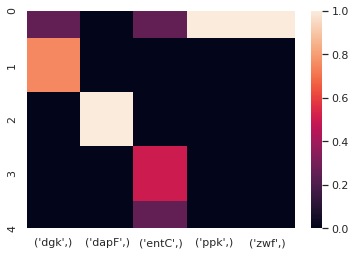

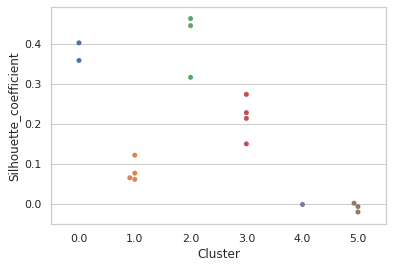

SC for number of clusters=  7 is  0.20833812512574626


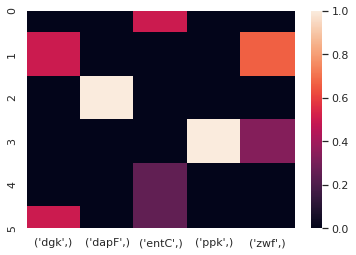

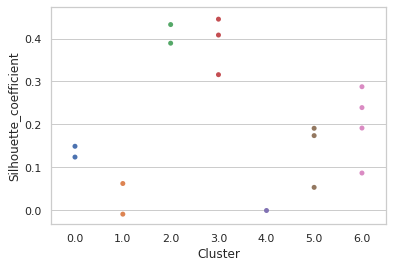

SC for number of clusters=  8 is  0.17119030320188824


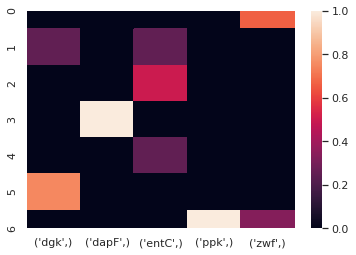

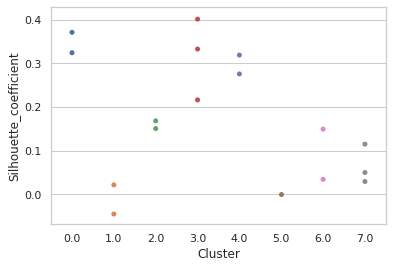

SC for number of clusters=  9 is  0.1860229984963933


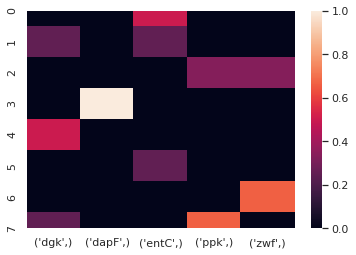

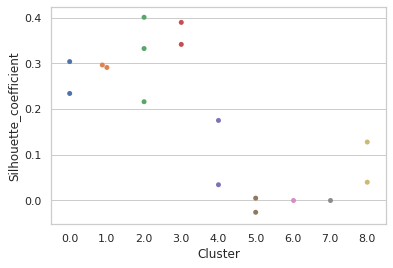

SC for number of clusters=  10 is  0.17193265098981006


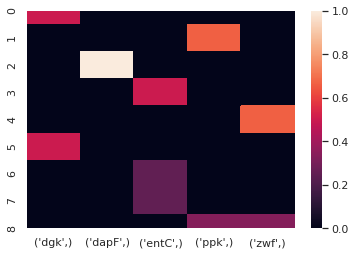

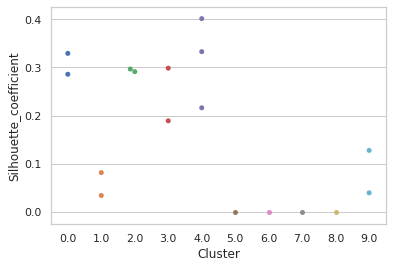

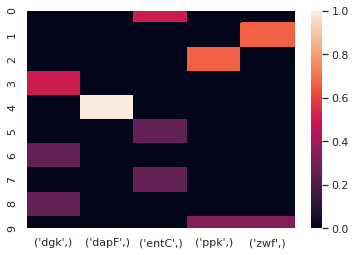

In [51]:
# Method to visualize 
# Through swarm plots
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,4,5, 6,7,8,9,10]

for no_clusters in range_n_clusters:
    
    kmeans= KMeans(n_clusters=no_clusters,random_state=2)
    cluster_labels = kmeans.fit_predict(X)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    sample_silhouette_score=silhouette_score(X, cluster_labels)
    print("SC for number of clusters= ",no_clusters,"is ",sample_silhouette_score)
    # cluster_labels.reshape(102,1)
    # sample_silhouette_values.reshape(102,1)
    # print((cluster_labels.shape))
    # print((sample_silhouette_values.shape))

    Matrix_cluster_silhouette=np.zeros((cluster_labels.size , 2))
    Matrix_cluster_silhouette[:,0]=cluster_labels
    Matrix_cluster_silhouette[:,1]=sample_silhouette_values



    Matrix_cluster_silhouette_pd=pd.DataFrame(Matrix_cluster_silhouette,columns=['Cluster','Silhouette_coefficient'])
    #     print(Matrix_cluster_silhouette_pd)
    plt.figure(no_clusters)
    swarm_cluster = sns.swarmplot(x="Cluster", y="Silhouette_coefficient", data=Matrix_cluster_silhouette_pd)
    plt.show()


    conditions=pd.DataFrame(['dgk','dapF','entC','ppk','zwf'])

    index_matrix=np.zeros((conditions.size,5))

    metadata=pd.read_excel('GSE85914_combined.xlsx', sheet_name = 'info', index_col = 0)

      # calculating the heat map which is a matrix which has the dimensions of no of clusters cross the no of unique conditions
    # in the metadata datdframe

    # Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,index=No_clusters, columns=conditions)

    for j in range(0,conditions.size):
        k=0
        for i in range(0,cluster_labels.size):
            if metadata.iloc[i,0]==conditions.iloc[j,0]:
                index_matrix[j,k]=i+1
                k+=1

    # Now we traverse the array of a matrix which is cluster x conditions(the final matrix) which is by default zero and each match 
    # adds an 1 at that particular row, like if condition = base has a cluster at cluster 1 then it's default value is changed by one. 
    #repeated iteratively for all elements in our matrix

    Matrix_Clusters_Conditions=np.zeros((no_clusters,conditions.size))

    for l in range(0,conditions.size):
        for m in range(0,5):
            if index_matrix[l,m]!=0:
                for n in range(0,no_clusters):
                    if cluster_labels[int(index_matrix[l,m])-1]==(n):
                        Matrix_Clusters_Conditions[n,l]+=1
                        break


    Matrix_Clusters_Conditions_Sum=np.sum(Matrix_Clusters_Conditions,axis=0)

    # Making into fraction 
    for j in range(0,conditions.size):
        Matrix_Clusters_Conditions[:,j]=Matrix_Clusters_Conditions[:,j]/Matrix_Clusters_Conditions_Sum[j]
    #transfering the data into a proper dataframe  

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)
    plt.figure(no_clusters)
    ax = sns.heatmap(Matrix_Clusters_Conditions_pd)



We observe from the above analysis of K means clustering that when the no of clusters are selected as 5, the silhouette values are relatively higher than all other number of clusters. Seeing from the heatmap(with no of clusters=5), we see dapF, ppk and zwf clustered together by themselves. dapF is observed to be clustered together, irrespective of the number of clusters. This type of clustering is k means clustering and the default distance metric used in python is euclidean distance(which cannot be changed, at least in the inbuilt function). We changed the random values too, and random value =2 provided the most consistent results. As said earlier we check or clusters are correct or not based on the Silhouettte coefficient, which uses cluster distance as a metric(distance from member from its own cluster vs members of the opposite cluster). The score was found out to be 0.2076(note when number of clusters were 7 the score was slightly higher but no additional inference could be made, so we used no of clusters =5)This score is not that good, generally scores are thresholded at 0.5-0.6 for reflecting good performance. We then moved to a DBSCAN algorithm, which gave us abymal results which were kind off obvious at the outset, since our samples were very low(17), DBSCAN assigned entire dataset as a single cluster. Changing the miminum samples to be considered a core point made either everything as a single cluster or every sample as it's own cluster. We could try to concatenate the matrix with our dataset in the homework to result in a better clustering for the future part of the project. 